<br>

### Exercício: Regressão Linear:
__Parte 1:__

1- Usando a função getData(), carregue os dados disponibilizados.

2- Separe parte dos dados para o dataset de teste.

3- Usando a metodologia de validação cruzada, teste diferentes parâmetros da regLinear - diferentes learning_rates e num_steps - para escolher a melhor combinação de parâmetros.

4- Implemente a regressão linear do scikit-learn e compare os resultados obtidos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_friedman1,make_classification

In [2]:
#função para acessar os dados do exercício 1

def getData():
    x, y = make_friedman1(n_samples = 10000, n_features = 5, noise = 5.0, random_state = 0)
    return x, y

In [3]:
#classe regLinear para exercício

class regLinear():
    
    def __init__(self, learning_rate, num_steps):
        self.learning_rate = learning_rate
        self.num_steps = num_steps
        
    def fit(self, x, y):
        y = y.reshape(-1,1)
        m = x.shape[0] 
        k = x.shape[1] 
        theta = np.random.randn(k+1,1) 
        X_b = np.c_[np.ones((m, 1)), x] 
        for step in range(self.num_steps):
            gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
            theta = theta - self.learning_rate * gradients
        self.theta_final = theta
        print("modelo treinado.")
        
    def predict(self, x):
        m = x.shape[0]
        X_b = np.c_[np.ones((m, 1)), x]
        preds = X_b.dot(self.theta_final)
        return preds.reshape(-1,)

In [4]:
#função para acessar os dados do exercício 2

def getData2():
    x, y = make_classification(n_classes=2, n_features=5, n_samples=10000, random_state = 0)
    return x, y

In [5]:
x,y=getData()

In [6]:
x.shape, y.shape

((10000, 5), (10000,))

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.model_selection import KFold

In [9]:
kf=KFold(n_splits=5)
from sklearn.metrics import mean_squared_error

In [10]:
def funcao(x,learning_rate,num_steps):
  lista=[]
  for train_idx,test_idx in kf.split(x):
    xtreino=x[train_idx]
    xteste=x[test_idx]
    ytreino=y[train_idx]
    yteste=y[test_idx]

    lin_reg=regLinear(learning_rate,num_steps)
    lin_reg.fit(xtreino,ytreino)
    lista.append(mean_squared_error(ytreino,lin_reg.predict(xtreino)))
  print("Media MSE:  ",round(np.mean(lista),3))
  print()
  plt.figure(figsize=[20,8])
  plt.title("Valores MSE",fontsize=14)
  plt.scatter(range(len(lista)),lista)
  plt.plot(range(len(lista)),lista)
  plt.xlim(-1,5)
  plt.ylim(20,40)
  plt.xlabel("Número de iterações")
  plt.ylabel("MSE")
  plt.show

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE:   30.827



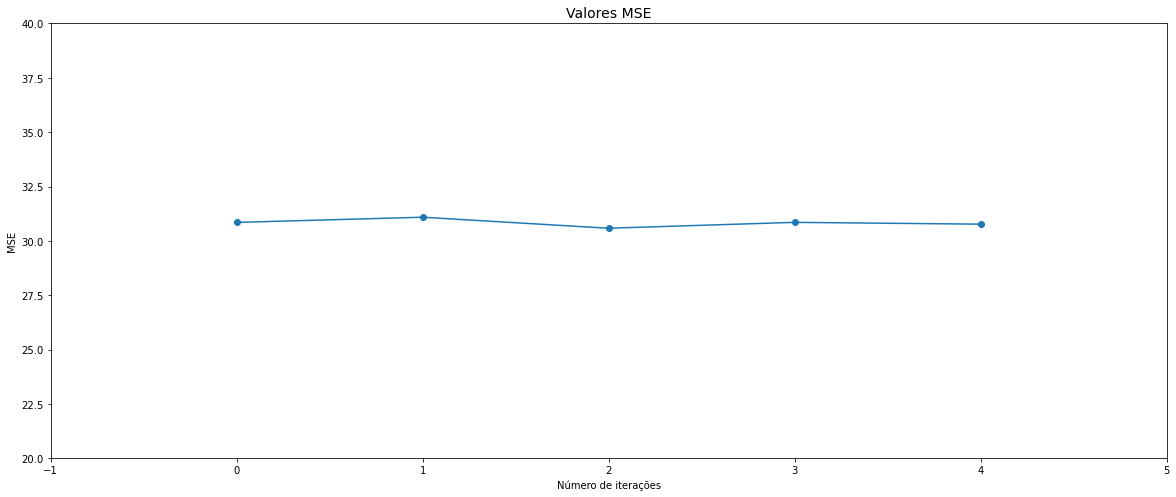

In [11]:
funcao(x,0.15,200)

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE:   35.953



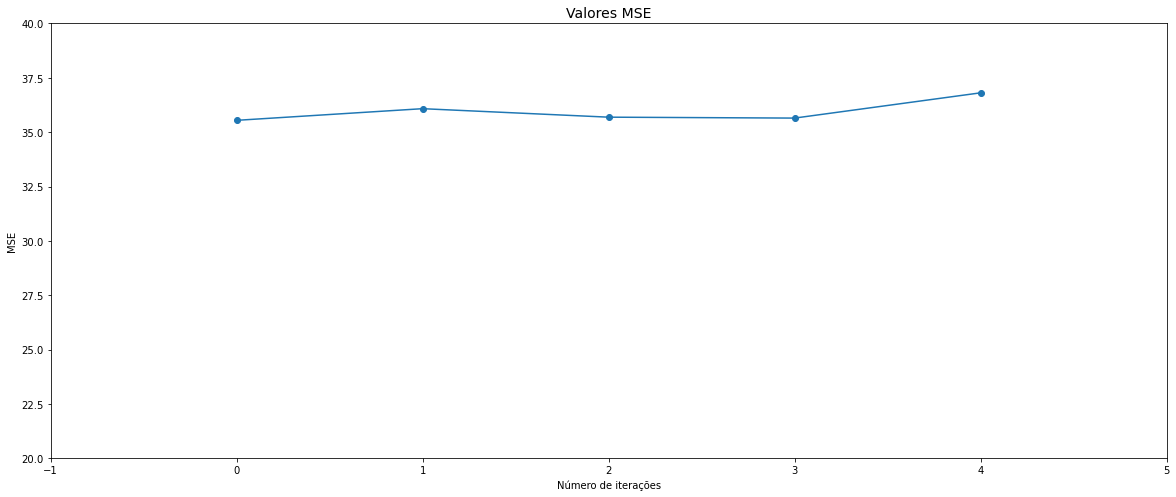

In [12]:
funcao(x,0.15,10)

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE:   31.118



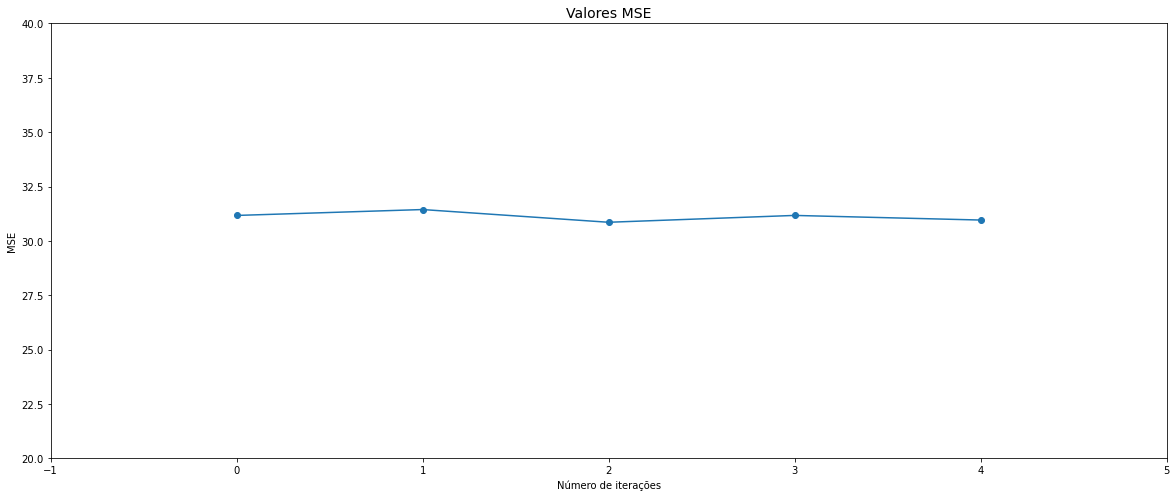

In [13]:
funcao(x,0.15,100)

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE:   34.875



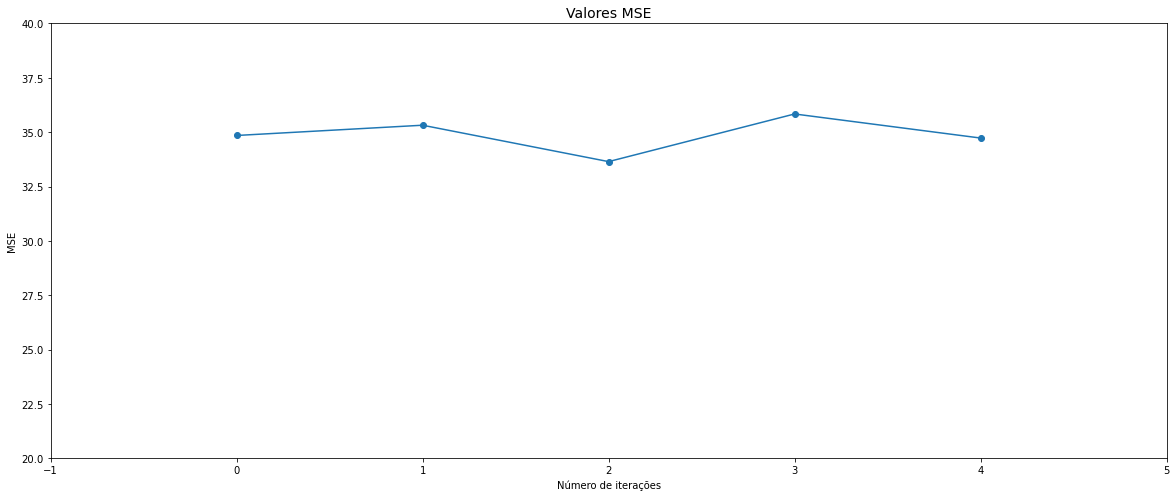

In [14]:
funcao(x,0.20,10)

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE:   30.952



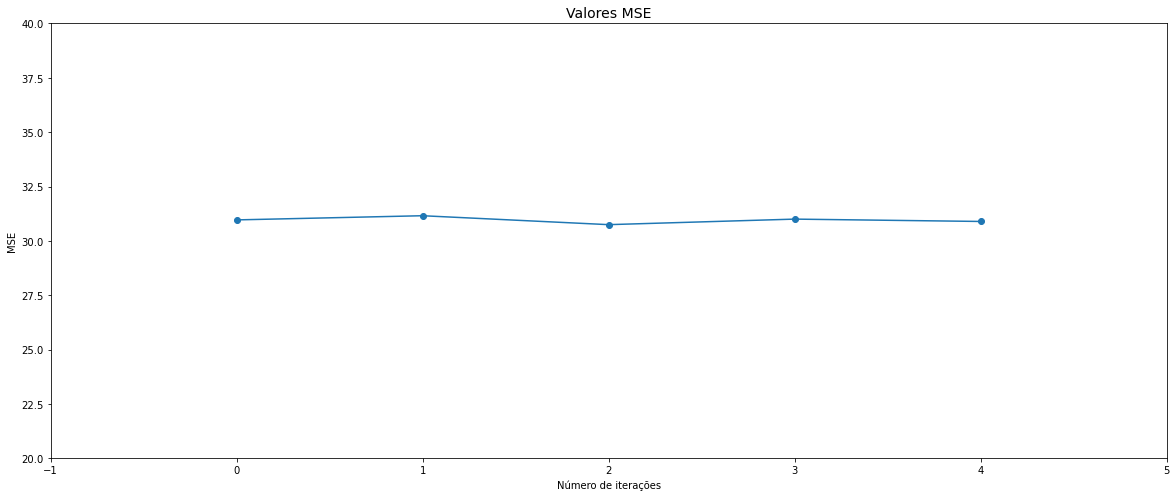

In [15]:
funcao(x,0.20,100)

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE:   30.803



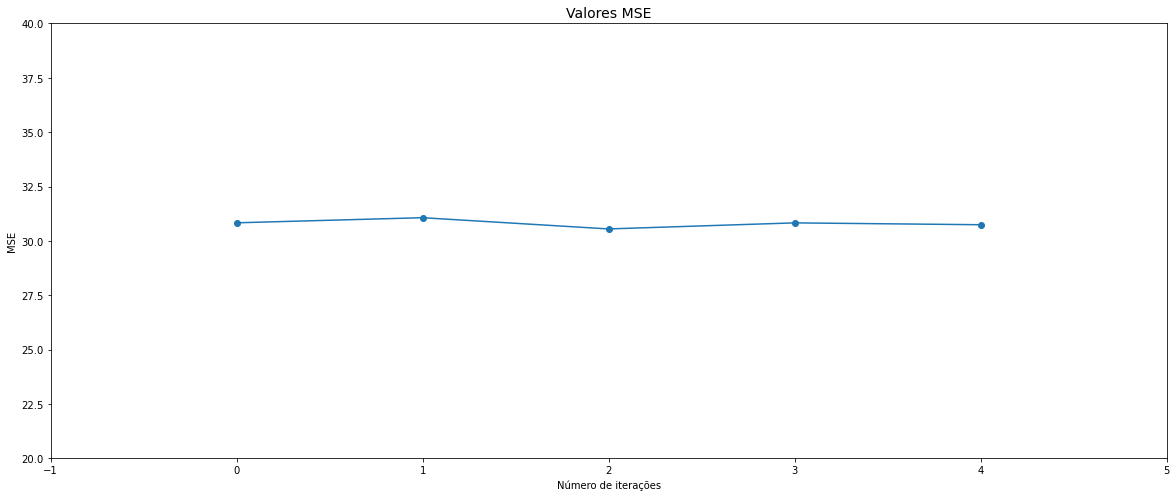

In [16]:
funcao(x,0.2,200)

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE:   30.831



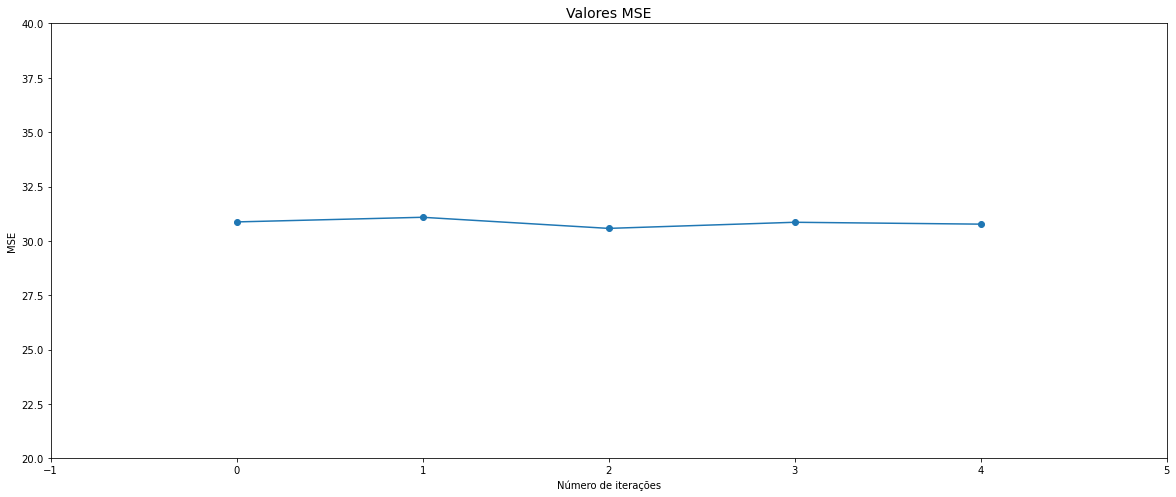

In [17]:
funcao(x,0.3,100)

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE:   30.796



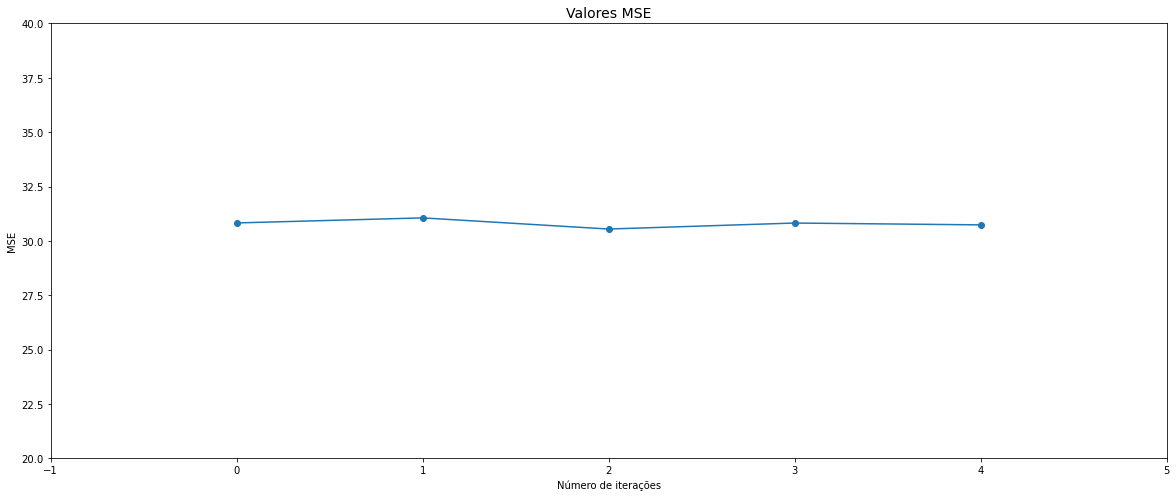

In [18]:
funcao(x,0.3,200)

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE:   30.969



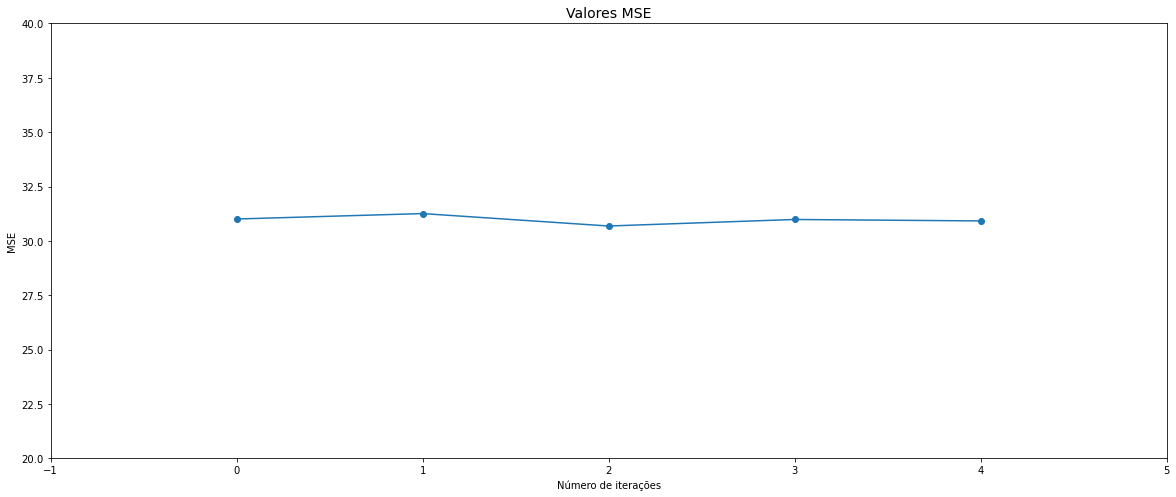

In [19]:
funcao(x,0.1,200)

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE:   31.683



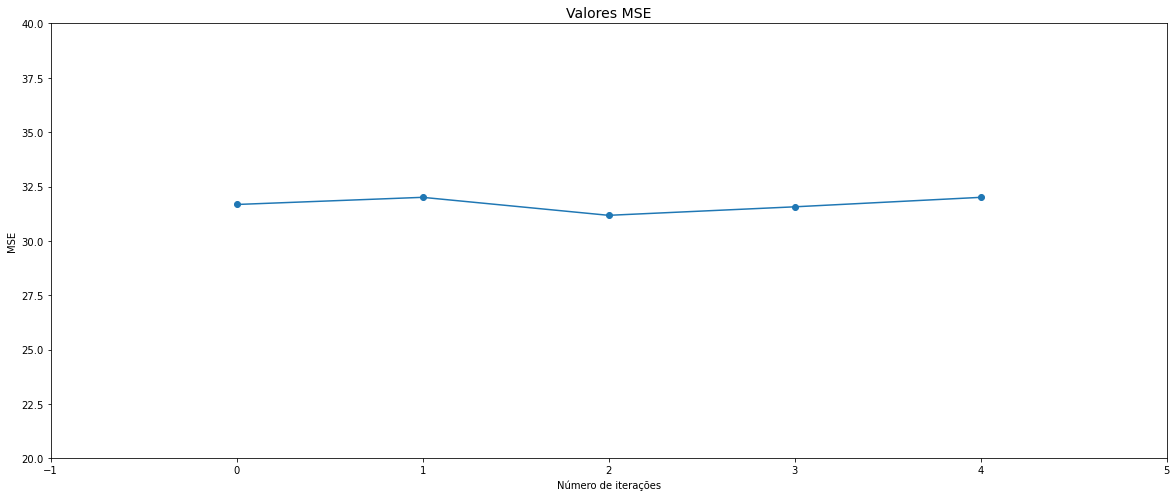

In [20]:
funcao(x,0.05,200)

# Ao final dos teste consegui identificar que os melhores parametros foram uma taxa de aprendizado de 0.2 com 200 passos apresentado um MSE médio de 30.804


In [21]:
from  sklearn.linear_model import LinearRegression

In [22]:
lr=LinearRegression()
lr.fit(x,y)

LinearRegression()

In [23]:
lr.intercept_, lr.coef_

(-0.05568613230242292,
 array([ 6.37661369,  7.0025    ,  0.21819147, 10.42594526,  4.78517778]))

In [24]:
ypred=lr.predict(x)
mse=mean_squared_error(y,ypred)

print(mse)

30.80303834132047


## Vimos que o valor do Mse da regressão linear do sklearn foi bem próximo do valor encontrado acima, o que comprova a escolha dos parâmetros.

In [25]:
from sklearn.metrics import mean_squared_error

def MSE(ytrue, ypred):
    return mean_squared_error(y_true = ytrue, y_pred = ypred)

In [26]:
learning_rate = 0.075
num_steps = 200

y = y.reshape(-1, 1)

m = x.shape[0] #qtd. linhas
k = x.shape[1] #qtd. colunas

theta = np.random.randn(k+1,1) # inicialização aleatórias dos parâmetros.
X_b = np.c_[np.ones((m, 1)), x] #colocando x0 = 1 em todas as instâncias de X

for step in range(num_steps):
    
    print('passo:', step)
    print('theta:', theta.reshape(-1,))
    
    #calcula o gradiente
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    
    #atualiza os valores de theta
    theta = theta - learning_rate * gradients
    
    
    #calculando o MSE dentro do passo:
    ypred_step = X_b.dot(theta)
    MSE_step = MSE(ytrue = y, ypred = ypred_step)
  
    print("MSE:", MSE_step)
    print('\n-----------------------------------------------------------\n') 

passo: 0
theta: [ 0.71675363 -0.21050696 -0.04475097  0.33910642 -0.16122992 -0.62867742]
MSE: 127.23916740927315

-----------------------------------------------------------

passo: 1
theta: [2.80442998 0.91229282 1.07634297 1.38219934 1.01290174 0.47717163]
MSE: 76.77595907319943

-----------------------------------------------------------

passo: 2
theta: [4.16303824 1.65737334 1.82245778 2.04788128 1.80871766 1.20652373]
MSE: 54.9143425346387

-----------------------------------------------------------

passo: 3
theta: [5.04277055 2.15426428 2.3221521  2.46590513 2.35573513 1.68854312]
MSE: 45.39774914695187

-----------------------------------------------------------

passo: 4
theta: [5.60798521 2.48805801 2.65988083 2.72150587 2.73904116 2.00808146]
MSE: 41.21050334355502

-----------------------------------------------------------

passo: 5
theta: [5.9666537  2.71465466 2.89112578 2.87067339 3.01453507 2.22088018]
MSE: 39.32490141337321

-----------------------------------------

MSE: 34.08139501424363

-----------------------------------------------------------

passo: 49
theta: [5.27395409 3.91955089 4.29305629 1.4457418  5.8533601  2.97375143]
MSE: 34.025430882416266

-----------------------------------------------------------

passo: 50
theta: [5.24489183 3.93521026 4.3119479  1.41655566 5.8964577  2.98164876]
MSE: 33.970575226973935

-----------------------------------------------------------

passo: 51
theta: [5.21598887 3.95075961 4.33068345 1.38780523 5.93909429 2.98952766]
MSE: 33.916803704691105

-----------------------------------------------------------

passo: 52
theta: [5.1872443  3.9661998  4.34926448 1.35948475 5.9812752  2.99738794]
MSE: 33.864092539058035

-----------------------------------------------------------

passo: 53
theta: [5.15865727 3.98153169 4.36769249 1.33158851 6.02300569 3.0052294 ]
MSE: 33.81241850669733

-----------------------------------------------------------

passo: 54
theta: [5.1302269  3.99675612 4.385969   1.30411087

MSE: 31.538470224308465

-----------------------------------------------------------

passo: 148
theta: [ 3.04794534  5.04754124  5.59446301 -0.01475557  8.52469648  3.64795334]
MSE: 31.528758630187774

-----------------------------------------------------------

passo: 149
theta: [ 3.0310558   5.05554081  5.6032764  -0.02009774  8.54031957  3.65357698]
MSE: 31.519195081524714

-----------------------------------------------------------

passo: 150
theta: [ 3.0142584   5.06348832  5.61202698 -0.02532956  8.555792    3.65917704]
MSE: 31.50977692262874

-----------------------------------------------------------

passo: 151
theta: [ 2.99755265  5.07138414  5.6207153  -0.03045265  8.57111542  3.66475356]
MSE: 31.500501552409748

-----------------------------------------------------------

passo: 152
theta: [ 2.98093805  5.07922865  5.62934187 -0.03546857  8.58629142  3.67030659]
MSE: 31.49136642315218

-----------------------------------------------------------

passo: 153
theta: [ 2.9644

In [27]:
def regLinearEquacaoNormal(x, y):
    # adicionando x0 = 1 em cada instância
    x = np.c_[np.ones((x.shape[0], 1)), x]
    
    transposta_X = x.T
    XTX = transposta_X.dot(x)
    inversa = np.linalg.inv( XTX )
    
    theta_best = inversa.dot(transposta_X).dot(y)
    return theta_best

In [28]:
regLinearEquacaoNormal(x, y)

array([[-0.05568613],
       [ 6.37661369],
       [ 7.0025    ],
       [ 0.21819147],
       [10.42594526],
       [ 4.78517778]])

In [29]:
class regLinear():
    
    def __init__(self, learning_rate, num_steps):
        self.learning_rate = learning_rate
        self.num_steps = num_steps
        
    def fit(self, x, y):
        y = y.reshape(-1,1)
        m = x.shape[0] 
        k = x.shape[1] 
        theta = np.random.randn(k+1,1) 
        X_b = np.c_[np.ones((m, 1)), x] 
        for step in range(self.num_steps):
            gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
            theta = theta - self.learning_rate * gradients
        self.theta_final = theta
        print("modelo treinado.")
        
    def predict(self, x):
        m = x.shape[0]
        X_b = np.c_[np.ones((m, 1)), x]
        preds = X_b.dot(self.theta_final)
        return preds

In [30]:
rg = regLinear(learning_rate = 0.075, num_steps = 200)

In [31]:
rg.fit(x, y)

modelo treinado.


In [32]:
rg.theta_final

array([[ 1.79213373],
       [ 5.58391912],
       [ 6.22825933],
       [-0.14161539],
       [ 9.28213845],
       [ 4.27977004]])

In [33]:
rg.predict(x)

array([[16.09651448],
       [18.58376476],
       [18.32224732],
       ...,
       [15.34485373],
       [17.56970918],
       [19.20007901]])

Comparando com o resultado da regressão linear do scikit-learn:

In [34]:
lm = LinearRegression()
lm.fit(x, y)
print(lm.intercept_, lm.coef_)
print()
lm.predict(x)

[-0.05568613] [[ 6.37661369  7.0025      0.21819147 10.42594526  4.78517778]]



array([[16.29170271],
       [19.20364386],
       [18.8105078 ],
       ...,
       [15.3053878 ],
       [17.95296077],
       [19.63525471]])

__Parte 2 (Introdução):__

Para cada variável explicativa $X_1, .., X_5$, crie outras variáveis usando o __quadrado__ de cada um delas. Desta forma, o conjunto final será de 10 variáveis, em que:

$X_6 = (X_1)^{2}$, $X_7 = (X_2)^{2}$, $X_8 = (X_3)^{2}$, $X_9 = (X_4)^{2}$, $X_{10} = (X_5)^{2}$.

Ao treinarmos uma regressão linear com essas 10 variáveis, a predição é da forma:

$y_{pred} = \theta_0 + \theta_1 \cdot X_1 + .. + \theta_5 \cdot X_5 + \theta_6 \cdot (X_1)^{2} + .. + \theta_{10} \cdot (X_5)^{2}$

Como estamos usando o quadrado das variáveis explicativas, dizemos que temos um __modelo de regressão polinomial de grau 2__. Podemos ter variações deste modelo:

-Podemos aumentar o grau: basta mudar a potência que elevamos as variáveis. Por exemplo, podemos incluir o __cubo__ das variáveis e termos um modelo polinomial de ordem 3.

-Podemos ter __interações__ entre as variáveis: multiplicações entre as variáveis.

Exemplo:

$y_{pred} = \theta_0 + \theta_1 \cdot X_1 + .. + \theta_5 \cdot X_5 + \theta_6 \cdot (X_1)^{2} + .. + \theta_{10} \cdot (X_5)^{2} + \theta_{11} \cdot (X_1)^{3} + \theta_{12} \cdot V1 + \theta_{13} \cdot V2$,

onde

$V_1 = X_1 \cdot X_2$ e $V_2 = (X_2)^{2} \cdot X_4$


__Parte 2 (Exercício):__

1- Estude o link:
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

em que é discutido como criar modelos polinomiais com o scikit-learn de forma detalhada.

2- Repita os passos da primeira parte, mas agora considerando polinômios de graus 2 ou mais.

3- Inclua regularização Ridge e Lasso nas análises e teste os resultados para diferentes parâmetros $\alpha$.

<br>



In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
poly_features = PolynomialFeatures(degree = 2, include_bias = False)

In [37]:
X_poly = poly_features.fit_transform(x)
X_poly.shape, y.shape

((10000, 20), (10000, 1))

In [38]:
poly_fit = LinearRegression()
poly_fit.fit(X_poly, y)

poly_fit.intercept_, poly_fit.coef_

(array([0.45048355]),
 array([[ 18.06635723,  18.29480455, -22.06837755,   8.34123951,
           5.44837505, -12.35980551,   0.46905488,   0.40408001,
           1.21913492,  -0.58589089, -12.14159426,   1.04002326,
           0.48739516,  -0.37435475,  20.99465285,   1.02029732,
          -0.10653987,   0.49017536,   0.50322174,  -0.43200621]]))

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [40]:
def polyFit(x, y, grau): 
    
    polybig_features = PolynomialFeatures(degree = grau, include_bias = False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    
    #criando um pipeline: sequencia de execução de passos
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    
    polynomial_regression.fit(x, y)
    return polynomial_regression

In [41]:
Xnovo, ynovo = getData()

In [42]:
for grau in [1,2,4,6]:
    
    print("grau: ", grau)
    
    polyfit = polyFit(x, y, grau)
    
    ypoly_novo = polyfit.predict(Xnovo)

    print("RMSE:")
    print('treino:', np.sqrt(np.mean(np.square(y - polyfit.predict(x)))))
    print('novos dados:', np.sqrt(np.mean(np.square(ynovo - polyfit.predict(Xnovo)))))
    print("------------------------------------------------\n\n")

grau:  1
RMSE:
treino: 5.550048499006155
novos dados: 8.220261135110288
------------------------------------------------


grau:  2
RMSE:
treino: 5.162092596094412
novos dados: 8.46926983275845
------------------------------------------------


grau:  4
RMSE:
treino: 4.95981816877996
novos dados: 8.589291891847981
------------------------------------------------


grau:  6
RMSE:
treino: 4.872039622771169
novos dados: 8.639384317465726
------------------------------------------------




<br>

__Conclusão:__
    
Nitidamente, polinômios de ordens altas acabam __overfitando__ os dados!

No entanto, o __polinômio de grau 1 obteve o melhor resultado:__ obteve um baixo RMSE em treino e conseguiu generalizar bem os dados.

<br>

Como podemos controlar o overfitting de modelos polinomiais com graus altos?

Uma técnica muito comum para isso é a __regularização!__

<br><br>

In [43]:
from sklearn.linear_model import Ridge, Lasso

In [44]:
def polyFitReg(x, y, grau, base_model, base_model_name):
    
    polybig_features = PolynomialFeatures(degree = grau, include_bias = False)
    std_scaler = StandardScaler()
    basemodel = base_model
    
    #criando um pipeline: sequencia de execução de passos
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            (base_model_name, base_model),
        ])
    
    polynomial_regression.fit(x, y)
    return polynomial_regression

In [45]:
grau = 10 

for alpha in [0, 0.001, 0.01, 0.1, 1, 10, 100]:
    
    model_name = 'Ridge_ alpha: '+str(alpha)
    polyfit = polyFitReg(x, 
                         y, 
                         grau, 
                         base_model = Ridge(alpha = alpha), 
                         base_model_name = model_name)
    
    ypoly_novo = polyfit.predict(Xnovo)

    print(model_name)
 
    print("RMSE:")
    print('treino:', np.sqrt(np.mean(np.square(y - polyfit.predict(x)))))
    print('novos dados:', np.sqrt(np.mean(np.square(ynovo - polyfit.predict(Xnovo)))))
    print("------------------------------------------------\n\n")

C:\Users\atmal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.43881e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ridge_ alpha: 0
RMSE:
treino: 4.1761437445234435
novos dados: 8.996348020437226
------------------------------------------------


Ridge_ alpha: 0.001
RMSE:
treino: 4.617983926470775
novos dados: 8.739159248140556
------------------------------------------------


Ridge_ alpha: 0.01
RMSE:
treino: 4.701408842756813
novos dados: 8.699818261690314
------------------------------------------------


Ridge_ alpha: 0.1
RMSE:
treino: 4.771965688079326
novos dados: 8.664860902230027
------------------------------------------------


Ridge_ alpha: 1
RMSE:
treino: 4.833897696241629
novos dados: 8.635176719540336
------------------------------------------------


Ridge_ alpha: 10
RMSE:
treino: 4.885332027428812
novos dados: 8.606923592636285
------------------------------------------------


Ridge_ alpha: 100
RMSE:
treino: 4.9330425056043525
novos dados: 8.565726542989516
------------------------------------------------




<br>

Veja que, usando polinômios de grau 10 conseguimos ter resultados satisfatórios, por exemplo ao usarmos $\alpha$ = 1.

No dia-a-dia, __é fundamental testar bem os dados para escolher os melhores parâmetros da regularização!__

In [46]:
from sklearn.model_selection import KFold

In [47]:
kf=KFold(n_splits=5)
from sklearn.metrics import mean_squared_error

In [48]:
lista=[0.07,0.08,0.09,0.1,0.12,0.13,0.14,0.15,0.16,0.17]
for i in lista:
  lista1=[]
  for train_idx,test_idx in kf.split(x):
    xtreino=x[train_idx]
    xteste=x[test_idx]
    ytreino=y[train_idx]
    yteste=y[test_idx]

    pol=PolynomialFeatures(degree=2,include_bias=False)
    xpol=pol.fit_transform(xtreino)

    lin_reg=regLinear(i,1000)
    lin_reg.fit(xpol,ytreino)
    lista1.append(mean_squared_error(ytreino,lin_reg.predict(xpol)))
  print("Media MSE com learning  rate  = ",i ,"\n" ,   round(np.mean(lista1),3))
  print()

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE com learning  rate  =  0.07 
 28.94

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE com learning  rate  =  0.08 
 28.612

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE com learning  rate  =  0.09 
 28.472

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE com learning  rate  =  0.1 
 28.322

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE com learning  rate  =  0.12 
 27.983

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE com learning  rate  =  0.13 
 27.845

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE com learning  rate  =  0.14 
 27.767

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
mod

### Com o teste acima determinamos que a melhor learning rate se trata de 0.14, a partir disso realizarei outro loop alterando o número de passos.

In [49]:
step=[250,500,1000,1500,2000,5000]
for s in step:
  lista1=[]
  for train_idx,test_idx in kf.split(x):
    xtreino=x[train_idx]
    xteste=x[test_idx]
    ytreino=y[train_idx]
    yteste=y[test_idx]

    pol=PolynomialFeatures(degree=2,include_bias=False)
    xpol=pol.fit_transform(xtreino)

    lin_reg=regLinear(0.14,s)
    lin_reg.fit(xpol,ytreino)
    lista1.append(mean_squared_error(ytreino,lin_reg.predict(xpol)))
  print("Media MSE com numeros de passos  = ",s ,"\n" ,   round(np.mean(lista1),3))
  print()

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE com numeros de passos  =  250 
 29.822

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE com numeros de passos  =  500 
 28.797

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE com numeros de passos  =  1000 
 27.864

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE com numeros de passos  =  1500 
 27.241

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE com numeros de passos  =  2000 
 26.979

modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
modelo treinado.
Media MSE com numeros de passos  =  5000 
 26.645



### Vimos que com  5000 passos encontramos um Mse bem baixo, porém, irei escolher 2000 passos como parâmetro,pois não houve diferença significativa com o valor encontrado em 5000 passos.

### Portanto os parâmetros selecionados para regressão polinomial de grau 2 sera de 0.14 a taxa de aprendizado e 2000 passos.

In [50]:
lr_pol=LinearRegression()

In [51]:
xpol1=pol.fit_transform(x)

In [52]:
lr_pol.fit(xpol1,y)

LinearRegression()

In [53]:
mse_pol=mean_squared_error(y,lr_pol.predict(xpol1))

In [54]:
print(mse_pol)

26.64719997065274


### Considerando o Mse da regressão do sklearn, vemos que ficou bem próximo do valor selecionado anteriormente, agora iremos instanciar a regularização.

In [55]:
from sklearn.linear_model import Ridge,Lasso

In [56]:
## Regularização Ridge

alpha=[0.01,0.1,1,10,100]
for a in alpha:
  lista1=[]
  for train_idx,test_idx in kf.split(x):
    xtreino=x[train_idx]
    xteste=x[test_idx]
    ytreino=y[train_idx]
    yteste=y[test_idx]

    pol=PolynomialFeatures(degree=2,include_bias=False)
    xpol=pol.fit_transform(xtreino)

    ridge=Ridge(alpha=a)
    ridge.fit(xpol,ytreino)
    lista1.append(mean_squared_error(ytreino,ridge.predict(xpol)))
  print("Media MSE com alpha   = ",a ,"\n" ,   round(np.mean(lista1),3))
  print()

Media MSE com alpha   =  0.01 
 26.632

Media MSE com alpha   =  0.1 
 26.632

Media MSE com alpha   =  1 
 26.644

Media MSE com alpha   =  10 
 27.175

Media MSE com alpha   =  100 
 29.871



In [57]:
## Regularização Lasso

alpha=[0.01,0.1,1,10,100]
for a in alpha:
  lista1=[]
  for train_idx,test_idx in kf.split(x):
    xtreino=x[train_idx]
    xteste=x[test_idx]
    ytreino=y[train_idx]
    yteste=y[test_idx]

    pol=PolynomialFeatures(degree=2,include_bias=False)
    xpol=pol.fit_transform(xtreino)

    lasso=Lasso(alpha=a)
    lasso.fit(xpol,ytreino)
    lista1.append(mean_squared_error(ytreino,lasso.predict(xpol)))
  print("Media MSE com alpha   = ",a ,"\n" ,   round(np.mean(lista1),3))
  print()

Media MSE com alpha   =  0.01 
 26.878

Media MSE com alpha   =  0.1 
 31.17

Media MSE com alpha   =  1 
 49.186

Media MSE com alpha   =  10 
 49.186

Media MSE com alpha   =  100 
 49.186



## Com a regularização é posssível constatar a melhor eficiência da regularização Ridge, apresentando um erro menor com alpha = 0

### Exercício: Regressão Logística:

__Parte 1:__

Crie uma classe regLogistica para treinar o modelo de regressão logística. Essa classe deve ser usada para problemas de classificação binária, cuja variável target assume os valores: 0 (classe negativa) e 1 (classe positiva).

O método construtor dessa classe deve possuir 3 parâmetros: learning_rate, num_steps e limiar.

Os outros médotos devem ser:

    - médoto fit: para treinar o modelo - usando gradient descent
    
    - médoto predict_proba: para retornar a probabilidade da classe 1
    
    - médoto predict: retornar a classe predita: 0 ou 1 - dependente do limiar
    

__Parte 2:__

Usando a função getData2(), carregue o dataset disponibilizado.

Use a regLogistica, classe criada na parte 1 do exercício, para treinar modelos nestes dados. Use validação cruzada para seleção dos parâmetros. Considere diferentes métricas de classificação e justifique as escolhas.

In [58]:
def getData2():
    x, y = make_classification(n_classes=2, n_features=5, n_samples=10000, random_state = 0)
    return x, y

In [59]:
def logLossCost(ytrue, ypred_probs):
    return (ytrue * np.log(ypred_probs) + (1 - ytrue) * np.log(1 - ypred_probs)).mean() * -1

In [60]:
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

In [69]:
class regLog():

    
    def __init__(self, learning_rate, num_steps,limiar):
        self.learning_rate = learning_rate
        self.num_steps = num_steps
        self.limiar=limiar
        
    def fit(self, x, y):
      y=y.reshape(-1,1)
      m=x.shape[0]
      k=x.shape[1]
      X_b=np.c_[np.ones((m,1)),x]
      theta=np.random.randn(k+1,1)
      for step in range(self.num_steps):
        yscore=sigmoid(X_b.dot(theta))
        gradient=X_b.T.dot(yscore-y)
        theta=theta-self.learning_rate*gradient
      self.theta_final=theta  

    def predict_proba(self, x):
      m=x.shape[0]
      X_b=np.c_[np.ones((m,1)),x] 

      probs = sigmoid(X_b.dot(self.theta_final))
      
      return probs.reshape(-1,)

    def predict(self,x):
      m=x.shape[0]
      X_b=np.c_[np.ones((m,1)),x] 

      probs = sigmoid(X_b.dot(self.theta_final))
      ypred= np.where(probs>self.limiar,1,0)
      return ypred

In [70]:
x1,y1=getData2()

In [210]:
x1=pd.DataFrame(x)
x1.head()

,0,1,2,3,4
0,0.548814,0.715189,0.602763,0.544883,0.423655
1,0.645894,0.437587,0.891773,0.963663,0.383442
2,0.791725,0.528895,0.568045,0.925597,0.071036
3,0.087129,0.020218,0.832620,0.778157,0.870012
4,0.978618,0.799159,0.461479,0.780529,0.118274


In [177]:
x2,y2=getData2()

In [71]:
rl=regLog(0.01,1000,0.5)

In [72]:
rl.fit(x1,y1)

In [73]:
rl.predict_proba(x1)

array([6.40748421e-02, 7.36137692e-06, 1.00000000e+00, ...,
       7.24939464e-17, 9.58473125e-27, 3.22064715e-15])

In [74]:
ypred=rl.predict(x1)

In [75]:
from  sklearn.metrics import confusion_matrix

In [76]:
ypred=np.where(rl.predict_proba(x1)>0.5,1,0)
cf=confusion_matrix(y1,ypred)

In [77]:
print(cf)

[[4198  796]
 [ 986 4020]]


In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
logi=LogisticRegression()

In [80]:
logi.fit(x1,y1)

LogisticRegression()

In [81]:
y12=logi.predict(x1)

In [82]:
cf1=confusion_matrix(y1,y12)

In [83]:
print(cf1)

[[4042  952]
 [ 785 4221]]


## Com a análise acima pude verificar a proximidade entre os valores da matrix do modelo criado e do modelo de regressão do scikitlearn, o que mostra que o modelo trabalhou bem

In [84]:
def func(x,y,v1,v2):
  lng_rate=[0.001,0.01,0.1,1]
  for l in lng_rate:
    reglog=regLog(l,v1,v2)
    reglog.fit(x,y)
    ypred=reglog.predict(x)
    cf=confusion_matrix(y,ypred)
    print(" Matriz de confusão para uma taxa de aprendizado de :",l )
  
    print(cf)
    print()

## testando os  dados variando a learnig rate

In [85]:
func(x1,y1,1000,0.5)

 Matriz de confusão para uma taxa de aprendizado de : 0.001
[[3703 1291]
 [ 853 4153]]

 Matriz de confusão para uma taxa de aprendizado de : 0.01
[[3690 1304]
 [ 935 4071]]



C:\Users\atmal\AppData\Local\Temp\ipykernel_8656\2222403639.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-t))


 Matriz de confusão para uma taxa de aprendizado de : 0.1
[[4193  801]
 [ 981 4025]]



C:\Users\atmal\AppData\Local\Temp\ipykernel_8656\2222403639.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-t))


 Matriz de confusão para uma taxa de aprendizado de : 1
[[4160  834]
 [ 939 4067]]



## Com a análise acima pude verificar qua a taxa de aprendizado de 0.1 se comportou melhor nos dados, por isso utlizarei ela na variação do numero de passos abaixo

In [191]:
def func1(x,y,v1,v2):
  num_steps=[100,500,1000,2000]
  for l in num_steps:
    reglog=regLog(v1,l,v2)
    reglog.fit(x,y)
    ypred=reglog.predict(x)
    cf=confusion_matrix(y,ypred)
    print(" Matriz de confusão para um número de passos de  :",l )
  
    print(cf)
    print()

In [192]:
func1(x1,y1,0.1,0.5)

C:\Users\atmal\AppData\Local\Temp\ipykernel_8656\2222403639.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-t))
C:\Users\atmal\AppData\Local\Temp\ipykernel_8656\2222403639.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-t))


 Matriz de confusão para um número de passos de  : 100
[[4158  836]
 [ 928 4078]]

 Matriz de confusão para um número de passos de  : 500
[[4121  873]
 [ 871 4135]]



C:\Users\atmal\AppData\Local\Temp\ipykernel_8656\2222403639.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-t))


 Matriz de confusão para um número de passos de  : 1000
[[4185  809]
 [ 975 4031]]



C:\Users\atmal\AppData\Local\Temp\ipykernel_8656\2222403639.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-t))


 Matriz de confusão para um número de passos de  : 2000
[[4205  789]
 [ 994 4012]]



## Após os testes pude verificar que com a taxa de 0.1 e número de passos = 1000 , apresentaram os melhores resultados.

### Verificando a acurácia:

In [173]:
from sklearn.model_selection import KFold
import time
kf = KFold(n_splits = 5)

In [178]:
t0 = time.time()


classif__ = LogisticRegression() 
lista_acuracia_treino = []
lista_acuracia_validacao = []

for train_index, val_index in kf.split(x1, y1):
    
    Xtrain_folds = x1[train_index]
    ytrain_folds = y1[train_index]
    Xval_fold = x2[val_index]
    yval_fold = y2[val_index]
    
    classif__.fit(Xtrain_folds, ytrain_folds)
    
    pred_treino = classif__.predict(Xtrain_folds)
    pred_validacao = classif__.predict(Xval_fold)
    
    lista_acuracia_treino.append(accuracy_score(y_pred = pred_treino, y_true = ytrain_folds))
    lista_acuracia_validacao.append(accuracy_score(y_pred = pred_validacao, y_true = yval_fold))
    
    
print("acurácias em treino: \n", lista_acuracia_treino, " \n| média: ", np.mean(lista_acuracia_treino))
print()
print("acurácias em validação: \n", lista_acuracia_validacao, " \n| média: ", np.mean(lista_acuracia_validacao))


t1 = time.time()
print("tempo (em segundos) para execução: ", np.round(t1-t0,2))

acurácias em treino: 
 [0.826125, 0.826125, 0.826625, 0.825, 0.825875]  
| média:  0.82595

acurácias em validação: 
 [0.8245, 0.82, 0.824, 0.834, 0.826]  
| média:  0.8257
tempo (em segundos) para execução:  0.06


### Ou podemos fazer:

In [180]:
predicoes = y12

qtd_acertos = (predicoes == y1).sum()
total_inst = y1.size

acuracia_sgd = qtd_acertos / total_inst
print("acurácia - em dados de treino - da regressão logística foi de : ", acuracia_sgd,'%')

acurácia - em dados de treino - da regressão logística foi de :  0.8263 %


### Ou podemos fazer:

In [155]:
from sklearn.metrics import accuracy_score

In [160]:
print(accuracy_score(y_true = y1, y_pred = logi.predict(x1))*100, '%')

82.63000000000001 %


### Validação cruzada manual

In [186]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator): 
    def fit(self, x1, y=None):
        return self
    def predict(self, x1):
        return np.zeros((len(x1), 1), dtype=bool)

In [187]:
classif__ = Never5Classifier()


lista_acuracia_treino = []
lista_acuracia_validacao = []


kf = KFold(n_splits = 5)

for train_index, val_index in kf.split(x1, y1):
    
    Xtrain_folds = x1[train_index]
    ytrain_folds = y1[train_index]
    Xval_fold = x2[val_index]
    yval_fold = y2[val_index]
    
    classif__.fit(Xtrain_folds, ytrain_folds)
    
    pred_treino = classif__.predict(Xtrain_folds)
    pred_validacao = classif__.predict(Xval_fold)
    
    lista_acuracia_treino.append(accuracy_score(y_pred = pred_treino, y_true = ytrain_folds))
    lista_acuracia_validacao.append(accuracy_score(y_pred = pred_validacao, y_true = yval_fold))
    
    
print("acurácias em treino: \n", lista_acuracia_treino, " \n| média: ", np.mean(lista_acuracia_treino))
print()
print("acurácias em validação: \n", lista_acuracia_validacao, " \n| média: ", np.mean(lista_acuracia_validacao))

acurácias em treino: 
 [0.496125, 0.497625, 0.503, 0.5015, 0.49875]  
| média:  0.49939999999999996

acurácias em validação: 
 [0.5125, 0.5065, 0.485, 0.491, 0.502]  
| média:  0.49939999999999996


### Tivemos uma média de acurácia próxima de 50% para o classificador ingênuo

In [128]:
from sklearn.metrics import precision_score, recall_score

In [193]:
classif__N5 = Never5Classifier()
classif__N5.fit(x1, y1)

Never5Classifier()

In [194]:
print("LogReg:")
print('Recall: ', recall_score(y_true = y1, y_pred = y12))
print('Precison: ', precision_score(y_true = y1, y_pred = y12))
print()
print("Classif. ingênuo:")
print('Recall: ', recall_score(y_true = y1, y_pred = classif__N5.predict(x1)))
print('Precison: ', precision_score(y_true = y1, y_pred = classif__N5.predict(x1)))

LogReg:
Recall:  0.8431881741909708
Precison:  0.8159675236806495

Classif. ingênuo:
Recall:  0.0
Precison:  0.0


C:\Users\atmal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Precision para classif. ingênuo = 0 / (0 + 0) = indeterminação; assumimos neste caso que é 0.

In [137]:
#Recall:
cf1[1,1] / cf1[1, :].sum()

0.8431881741909708

In [138]:
#Precision:
cf1[1,1] / cf1[:, 1].sum()

0.8159675236806495

### F1 score

In [195]:
from sklearn.metrics import f1_score

In [197]:
print('F1 Score - reg. logística: ', f1_score(y_true = y1, y_pred = logi.predict(x1)))
print('F1 Score - classif. ingênuo: ', f1_score(y_true = y1, y_pred = classif__N5.predict(x1)))

F1 Score - reg. logística:  0.8293545534924845
F1 Score - classif. ingênuo:  0.0


### Vamos abaixo reimplementar nossa validação cruzada considerando essas novas métricas:

In [198]:
def validacao_cruzada(classificador, 
                      x, 
                      y, 
                      metrica, 
                      num_folds, 
                      print_info = False, 
                      nome_metrica = None):
    
    lista_metrica_treino = []
    lista_metrica_validacao = []
    
    kf = KFold(n_splits = num_folds)
    for train_index, val_index in kf.split(x, y):
        
        Xtrain_folds = x1[train_index]
        ytrain_folds = y1[train_index]
        Xval_fold = x1[val_index]
        yval_fold = y1[val_index]
        
        classificador.fit(Xtrain_folds, ytrain_folds)
        
        pred_treino = classificador.predict(Xtrain_folds)
        pred_validacao = classificador.predict(Xval_fold)
        
        lista_metrica_treino.append(metrica(y_pred = pred_treino, y_true = ytrain_folds))
        lista_metrica_validacao.append(metrica(y_pred = pred_validacao, y_true = yval_fold))
        
    if print_info:
        print("Métrica: " + nome_metrica)
        print('média treino:', np.mean(lista_metrica_treino))
        print('média validação:', np.mean(lista_metrica_validacao))
        
    return lista_metrica_treino, lista_metrica_validacao

__Avaliando a regressão logística nas métricas precision, recall e F1:__

In [201]:
t0 = time.time()

for metrica, nome_metrica in zip([precision_score, recall_score, f1_score], ['Precision', 'Recall', 'F1']):
    l1, l2 = validacao_cruzada(classificador = LogisticRegression(),
                 x = x1, 
                 y = y1, 
                 metrica = metrica, 
                 num_folds = 5,
                 print_info = True,
                 nome_metrica = nome_metrica)
    print()
    
t1 = time.time()
print("tempo (em segundos) para execução: ", np.round(t1-t0,2))

Métrica: Precision
média treino: 0.8155967911000964
média validação: 0.81470394544451

Métrica: Recall
média treino: 0.84287902695603
média validação: 0.8435673522237274

Métrica: F1
média treino: 0.8290127053140711
média validação: 0.8288641815003223

tempo (em segundos) para execução:  0.23


__Avaliando o classificador ingênuo:__

In [202]:
for metrica, nome_metrica in zip([precision_score, recall_score, f1_score], ['Precision', 'Recall', 'F1']):
    l1, l2 = validacao_cruzada(classificador = Never5Classifier(),
                 x = x1, 
                 y = y1, 
                 metrica = metrica, 
                 num_folds = 5,
                 print_info = True,
                 nome_metrica = nome_metrica)
    print()

Métrica: Precision
média treino: 0.0
média validação: 0.0

Métrica: Recall
média treino: 0.0
média validação: 0.0

Métrica: F1
média treino: 0.0
média validação: 0.0



C:\Users\atmal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\atmal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\atmal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\atmal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision 

### Curva ROC

In [144]:
from sklearn.metrics import roc_curve

In [149]:
fpr, tpr, thresholds = roc_curve(y_true = y1, y_score = logi.predict_proba(x1)[:, 1])

#fpr = false positive rate = taxa de falso positivos
#tpr = true positive rate = taxa de verdadeiro positivos
#thresholds = limiares usados

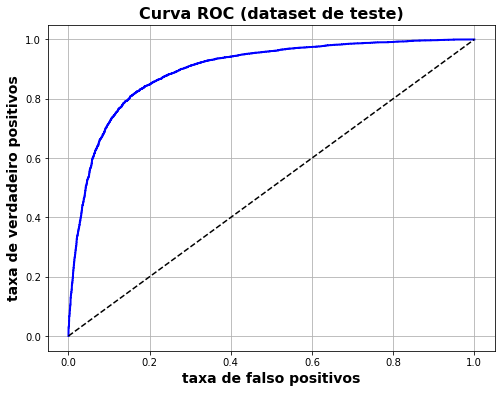

In [150]:
plt.figure(figsize=[8,6])
plt.plot(fpr, tpr, c = 'blue', lw = 2)
plt.title("Curva ROC (dataset de teste)", fontsize = 16, fontweight = 'bold')
plt.xlabel("taxa de falso positivos", fontsize = 14, fontweight = 'bold')
plt.ylabel("taxa de verdadeiro positivos", fontsize = 14, fontweight = 'bold')
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
plt.grid()
plt.show()

A curva ROC acaba sendo uma métrica muito visual. Para quantificarmos um valor associado a ela, é muito interessante calcularmos a __área sobre a curva ROC.__ Essa métrica é também conhecida como __AUC-ROC: area under curve ROC.__

A AUC varia entre 0 e 1, sendo que 1 é o melhor valor possível.

No gráfico, a linha pontilhada corresponde a um classificador aleatório, isto é, um modelo sem inteligência que vota 0 ou 1 de forma totalmente aleatória. Neste caso, a AUC do classificador aleatório é 0.5. __Quanto maior for a área entre a linha pontilhada e a curva ROC do algoritmo, melhor sua performance!__

Usando o sklearn:

In [151]:
from sklearn.metrics import roc_auc_score

In [153]:
roc_auc_score(y_true = y1, y_score = logi.predict_proba(x1)[:, 1])

0.8984278137360517

In [154]:
random_classifier = np.random.choice(a = [0,1], size = y.size, replace = True)

roc_auc_score(y_true = y, y_score = random_classifier)

0.5073702240750254

### Média precision, recall e f1

In [204]:
precision_score(y_true = y1, y_pred = logi.predict(x1), average = None)

array([0.83737311, 0.81596752])

In [205]:
recall_score(y_true = y1, y_pred = logi.predict(x1), average = None)

array([0.80937125, 0.84318817])

In [206]:
f1_score(y_true = y1, y_pred = logi.predict(x1), average = None)

array([0.8231341 , 0.82935455])

Finalmente, podemos ter um __consolidado dessas métricas:__

In [207]:
prec_final = precision_score(y_true = y1, y_pred = logi.predict(x1), average = None).mean()
recall_final = recall_score(y_true = y1, y_pred = logi.predict(x1), average = None).mean()
f1_final = f1_score(y_true = y1, y_pred = logi.predict(x1), average = None).mean()

print("Precision Final (média): ", np.round(prec_final,4))
print("Recall Final (média): ", np.round(recall_final,4))
print("F1 Final (média): ", np.round(f1_final,4))

Precision Final (média):  0.8267
Recall Final (média):  0.8263
F1 Final (média):  0.8262
